In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
from matplotlib_venn import venn3
sns.set_theme(style="whitegrid")
os.chdir('/mnt/BioAdHoc/Groups/vd-ay/kfetter/hichip-db-loop-calling')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

In [4]:
for f in glob.glob("results/tables/update_10.16.2024/tsv/*qc*"):
    file = pd.read_csv(f, header = 0, sep = "\t")
    #file = file[["Sample Name ChIP-seq", "num_reads_chipseq", "Paired", "Tagmentation", "unique_mapped_reads", "unique_genome_pos", "nrf", "m1", "m2", "pbc1", "pbc2", "mapped_reads_narrowpeak", "frip", "nsc", "rsc"]]
    #file.columns = ["Sample Name ChIP-seq", "Number of Reads", "Single or Paired End", "Tagmentation Status", "Unique Mapped Reads", "Unique Genome Positions", "NRF", "M1", "M2", "PBC1", "PBC2", "Mapped Reads Narrowpeak", "FRiP", "NSC", "RSC"]
    outfile = f.strip().split(".tsv")[0] + ".xlsx"
    file.to_excel(outfile.replace("tsv", "xlsx"))

In [6]:
writer = pd.ExcelWriter("results/tables/update_10.16.2024/xlsx/loops_summary.xlsx", engine = 'openpyxl')

for f in glob.glob("results/tables/update_10.16.2024/tsv/*loops*"):
    file = pd.read_csv(f, header = 0, sep = "\t")
    sheet = f.strip().split("/")[4].split(".10")[0]
    if "fithichip" in sheet: 
        file.columns = ["Sample Name", "Number of Peaks (HiChIP)", "Stringent 5kb", "Loose 5kb", "Stringent 10kb", "Loose 10kb", "Stringent 25kb", "Loose 25kb"]
    elif "chipseq" in sheet:
        file.columns = ["Sample Name", "Number of Peaks (ChIP-seq)", "Stringent 5kb", "Loose 5kb", "Stringent 10kb", "Loose 10kb", "Stringent 25kb", "Loose 25kb"]
    elif "hiccups" in sheet:
        file.columns = ["Sample Name", "5kb", "10kb", "25kb"]
    file.to_excel(writer, sheet_name = sheet, index = False)
writer.close()

/mnt/BioAdHoc/Groups/vd-ay/kfetter/packages/mambaforge/envs/hichip-db/lib/python3.9/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
/mnt/BioAdHoc/Groups/vd-ay/kfetter/packages/mambaforge/envs/hichip-db/lib/python3.9/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
/mnt/BioAdHoc/Groups/vd-ay/kfetter/packages/mambaforge/envs/hichip-db/lib/python3.9/site-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
/mnt/Bi

#### Show that FitHiChIP Captures Good Samples that HiCCUPS Doesn't

In [2]:
hiccups = pd.read_csv("hg38_hiccups_unmerged.tsv", sep = "\t", header = 0)
qc_flags = pd.read_csv("hg38_qcflags_unmerged.tsv", sep = "\t", header = 0)

In [3]:
len(hiccups[hiccups["5kb"] >= 1000])

191

In [6]:
hiccups_samples = list((hiccups[hiccups["5kb"] >= 1000]["Sample Name"]))
qc_flags_filt = qc_flags[~qc_flags['Sample Name'].isin(hiccups_samples)].reset_index(drop=True)

In [7]:
qc_flags_filt

,Sample Name,Pre-Processing Flag,Peaks Aggregate Flag,Loops Aggregate Flag Stringent 5kb,Loops Aggregate Flag Loose 5kb,Loops Aggregate Flag Stringent 10kb,Loops Aggregate Flag Loose 10kb,Loops Aggregate Flag Stringent 25kb,Loops Aggregate Flag Loose 25kb,Number of Reads,Number of Valid Pairs,Mean Mapping Percentage,Percent Valid Pairs,Percent Duplicate Pairs,Percent Cis Pairs,Percent Cis Long-Range Pairs,Number of Peaks,Stringent 5kb,Loose 5kb,Stringent 10kb,Loose 10kb,Stringent 25kb,Loose 25kb
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,Warning,Warning,Poor,Poor,Poor,Poor,Poor,Poor,45904302,3014685,0.850701,0.711072,0.788202,0.176370,0.851947,29430,0,0,0,0,0,0
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,Warning,Warning,Poor,Poor,Poor,Poor,Poor,Poor,92276625,4869234,0.853417,0.563581,0.789850,0.156848,0.802779,73184,0,0,0,0,3,5
2,293T.GSE128106.Homo_Sapiens.YY1.b1,Poor,Poor,Poor,Poor,Poor,Poor,Poor,Poor,247695887,1110646,0.659306,0.287823,0.954823,0.797952,0.807205,987,0,0,0,0,0,0
3,A375.GSE210423.Homo_Sapiens.H3K27ac.b1,Good,Good,Good,Good,Good,Good,Good,Good,223170101,37861604,0.866507,0.815984,0.589952,0.724251,0.760548,45783,1794,11045,5244,29693,17305,64321
4,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,Good,Good,Good,Good,Good,Good,Good,Good,278154964,42076548,0.968985,0.622615,0.579879,0.732737,0.740199,60295,3514,11200,11313,34768,33321,79208
5,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b1,Good,Warning,Poor,Poor,Warning,Warning,Warning,Warning,206270961,69427559,0.886074,0.805305,0.151758,0.721329,0.830768,3305,3,28,356,830,5041,9248
6,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b2,Good,Warning,Poor,Poor,Warning,Warning,Warning,Warning,209189000,72739006,0.898641,0.804191,0.160266,0.721151,0.830892,3919,11,45,435,965,5983,10937
7,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b3,Good,Good,Poor,Poor,Warning,Good,Good,Good,106425234,31983416,0.909318,0.751713,0.270091,0.810723,0.796745,7279,19,81,415,1510,5095,12966
8,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b4,Good,Good,Warning,Warning,Good,Good,Good,Good,137721218,46263978,0.907843,0.769889,0.189516,0.731284,0.830916,19328,234,873,2449,8083,16852,42606
9,A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b5,Good,Good,Good,Good,Good,Good,Good,Good,267255826,70320120,0.976127,0.680070,0.349435,0.734870,0.827816,41327,1326,4085,9582,25901,48939,102732


In [12]:
print(len(hiccups_samples))
print(len(qc_flags_filt))
print(len(qc_flags_filt[(qc_flags_filt["Loops Aggregate Flag Stringent 5kb"] == "Good") & (qc_flags_filt["Stringent 5kb"] > 1000)]))
print(len(qc_flags_filt[(qc_flags_filt["Stringent 5kb"] > 100) | (qc_flags_filt["Loose 5kb"] > 100) | (qc_flags_filt["Stringent 10kb"] > 100) | (qc_flags_filt["Loose 10kb"] > 100) | (qc_flags_filt["Stringent 25kb"] > 100) | (qc_flags_filt["Loose 25kb"] > 100)]))
#print(len(qc_flags_filt[(qc_flags_filt["Loops Aggregate Flag Stringent 5kb"] == "Good") | (qc_flags_filt["Loops Aggregate Flag Stringent 5kb"] == "Warning")]))

191
572
101
485


#### Explore Sample Set

In [2]:
samples = pd.read_csv("results/samplesheets/post-hicpro/2024.11.06.h3k27ac_top_samples.tsv", header = 0, sep = "\t")
samples

,Sample Name,Immune,Non-Immune,Peaks,Stringent 5kb,Loose 5kb,Stringent 10kb,Loose 10kb,Stringent 25kb,Loose 25kb,num_reads,num_vp,mean_mapping_percentage,percent_validpairs,percent_duplicate,percent_cis,precent_cis_long_range,Sample Name ChIP-seq,num_reads_chipseq,Paired,Tagmentation,unique_mapped_reads,unique_genome_pos,nrf,m1,m2,pbc1,pbc2,mapped_reads_narrowpeak,frip,nsc,rsc,Number of Peaks,Average Peak Size (bp),PREPROCESSING_FLAG,CHIPSEQ_PREPROCESSING_FLAG,PEAKS_AGG_FLAG,LOOPS_AGG_FLAG_S5,LOOPS_AGG_FLAG_L5,LOOPS_AGG_FLAG_S10,LOOPS_AGG_FLAG_L10,LOOPS_AGG_FLAG_S25,LOOPS_AGG_FLAG_L25
0,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,NaN,1.0,163779,12786,53896,28571,110387,64184,158929,6.920000e+08,49418834.0,0.841144,0.354937,0.673887,0.795363,0.747802,Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1,28490051.0,Single-End,No Tagmentation,28192070.0,24899246,0.883,23718516,1122370,0.952,21.132,6116293,0.216,1.011189,1.767121,163779,657.5347,Warning,Good,Good,Warning,Warning,Warning,Warning,Warning,Warning
1,CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1,NaN,1.0,130219,40515,146863,75629,226532,133443,282327,4.000000e+08,185000000.0,0.955397,0.953696,0.282025,0.902676,0.526701,CD34+-Cord-Blood.GSE107147.Homo_Sapiens.H3K27ac.b1,10495123.0,Paired-End,No Tagmentation,10242085.0,9010672,0.879,8556810,442617,0.949,19.332,1928046,0.188,1.137216,1.694889,130219,476.2631,Good,Good,Good,Good,Good,Good,Good,Good,Good
2,CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,1.0,NaN,110091,15478,43066,18402,57935,19891,63134,2.300000e+08,15319897.0,0.753676,0.971991,0.828741,0.688117,0.748701,CD4N_merged_donors.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,135000000.0,Single-End,Tagmentation,129000000.0,76595874,0.594,49680887,16728926,0.648,2.969,19961638,0.155,1.041816,0.920199,110091,863.9367,Warning,Good,Good,Warning,Warning,Warning,Warning,Warning,Warning
3,CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,1.0,NaN,110091,11963,36227,14729,50147,16336,56006,2.290000e+08,11992904.0,0.783790,0.976657,0.872088,0.710554,0.764804,CD4N_merged_donors.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,135000000.0,Single-End,Tagmentation,129000000.0,76595874,0.594,49680887,16728926,0.648,2.969,19961638,0.155,1.041816,0.920199,110091,863.9367,Warning,Good,Good,Warning,Warning,Warning,Warning,Warning,Warning
4,CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,1.0,NaN,110091,21615,68436,26043,88810,28157,92462,5.000000e+08,24526562.0,0.758849,0.977936,0.870577,0.697305,0.786632,CD4N_merged_donors.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,135000000.0,Single-End,Tagmentation,129000000.0,76595874,0.594,49680887,16728926,0.648,2.969,19961638,0.155,1.041816,0.920199,110091,863.9367,Warning,Good,Good,Warning,Warning,Warning,Warning,Warning,Warning
5,CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,1.0,NaN,110091,17826,58259,20411,72569,21460,73616,2.110000e+08,16791101.0,0.810429,0.977015,0.821251,0.708325,0.747825,CD4N_merged_donors.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,135000000.0,Single-End,Tagmentation,129000000.0,76595874,0.594,49680887,16728926,0.648,2.969,19961638,0.155,1.041816,0.920199,110091,863.9367,Good,Good,Good,Good,Good,Good,Good,Good,Good
6,CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,1.0,NaN,110091,22414,71723,27050,91813,29925,96131,4.950000e+08,28212770.0,0.798873,0.980278,0.862793,0.701763,0.793136,CD4N_merged_donors.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,135000000.0,Single-End,Tagmentation,129000000.0,76595874,0.594,49680887,16728926,0.648,2.969,19961638,0.155,1.041816,0.920199,110091,863.9367,Warning,Good,Good,Warning,Warning,Warning,Warning,Warning,Warning
7,CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged,1.0,NaN,110091,25367,81585,28747,99446,31650,101129,4.600000e+08,31850103.0,0.769498,0.977720,0.825166,0.701169,0.779240,CD4N_merged_donors.phs001703v3p1.Homo_Sapiens.H3K27ac.b1,135000000.0,Single-End,Tagmentation,129000000.0,76595874,0.594,49680887,16728926,0.648,2.969,19961

In [3]:
samples["Category"] = samples.apply(lambda x : "Immune" if x["Immune"] == 1.0 else "Non-Immune", axis = 1)
samples["Category"].value_counts()

Non-Immune    27
Immune        27
Name: Category, dtype: int64

In [4]:
" ".join(list(samples.loc[(samples["Category"] == "Immune") & (samples["Sample Name"].str.contains("merged"))]["Sample Name"]))

'CD4_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged CD4_Naive_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged CD4_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged Monocyte_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged Monocyte_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.biorep_merged NK92-SAHA.GSE227663.Homo_Sapiens.H3K27ac.biorep_merged NK92.GSE227663.Homo_Sapiens.H3K27ac.biorep_merged'

In [5]:
" ".join(list(samples.loc[(samples["Category"] == "Immune") & ~(samples["Sample Name"].str.contains("merged"))]["Sample Name"]))

'CD4_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 CD4_Naive_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 CD4_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 CD8_Naive_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 CD8_Naive_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 CD8_Naive_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 CD8_Naive_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 Naive_B_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 Naive_B_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 Naive_B_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 Naive_B_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 Natural_Killer_1800-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 Natural_Killer_1814-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 Natural_Killer_1815-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 Natural_Killer_1816-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 Natural_Killer_1829-RH-1.phs001703v3p1.Homo_Sapiens.H3K27ac.b1 Natural_Killer_1831-RH-1.phs001703v3p1.Homo_Sapiens.H3

In [6]:
" ".join(list(samples.loc[(samples["Category"] == "Non-Immune") & ~(samples["Sample Name"].str.contains("merged"))]["Sample Name"]))

'Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1 CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1 COLO320-DM.GSE159985.Homo_Sapiens.H3K27ac.b1 DTC1-WT.GSE180194.Homo_Sapiens.H3K27ac.b1 hCM-Ctrl.GSE165303.Homo_Sapiens.H3K27ac.b1 hCM-HAND1OE.GSE165303.Homo_Sapiens.H3K27ac.b1 JN-DSRCT1.shEWSWT1.GSE212978.Homo_Sapiens.H3K27ac.b1 JN-DSRCT1.shGFP.GSE212978.Homo_Sapiens.H3K27ac.b1 KYSE140_ARV2hrs.GSE166232.Homo_Sapiens.H3K27ac.b1 KYSE140_DMSO2hrs.GSE166232.Homo_Sapiens.H3K27ac.b1 KYSE140.GSE166232.Homo_Sapiens.H3K27ac.b1 LHSAR.GSE235245.Homo_Sapiens.H3K27ac.b1 MCF7-Abemaciclib.GSE157381.Homo_Sapiens.H3K27ac.b1 MCF7-DMSO.GSE157381.Homo_Sapiens.H3K27ac.b1 MDA-MB-453-Abemaciclib.GSE157381.Homo_Sapiens.H3K27ac.b1 SNU16.GSE159985.Homo_Sapiens.H3K27ac.b1 SUCCS1-siEA.GSE180194.Homo_Sapiens.H3K27ac.b1 SUCCS1-WT.GSE180194.Homo_Sapiens.H3K27ac.b1'

In [7]:
" ".join(list(samples.loc[(samples["Category"] == "Non-Immune") & (samples["Sample Name"].str.contains("merged"))]["Sample Name"]))

'LHSAR.GSE235245.Homo_Sapiens.H3K27ac.biorep_merged LNCaP.GSE235245.Homo_Sapiens.H3K27ac.biorep_merged MDA-MB-231-PVT1sgRNAR2.GSE97585.Homo_Sapiens.H3K27ac.biorep_merged MDA-MB-231-PVT1sgRNAR3.GSE97585.Homo_Sapiens.H3K27ac.biorep_merged MDA-MB-231-sgRNA-Ctrl.GSE97585.Homo_Sapiens.H3K27ac.biorep_merged SNU719.GSE239992.Homo_Sapiens.H3K27ac.biorep_merged Wei-22RV1-Control.GSE200165.Homo_Sapiens.H3K27ac.biorep_merged Wei-22RV1-Myc.GSE200165.Homo_Sapiens.H3K27ac.biorep_merged YCCEL1.GSE239992.Homo_Sapiens.H3K27ac.biorep_merged'

<AxesSubplot:xlabel='Category', ylabel='count'>

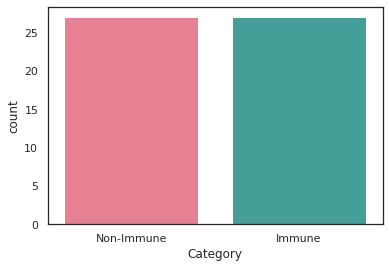

In [8]:
sns.set_style("white")
sns.countplot(data=samples, x="Category", palette="husl")

[Text(0.5, 0, 'ChIP-seq Peaks'), Text(0, 0.5, 'Stringent 5kb FC Loops')]

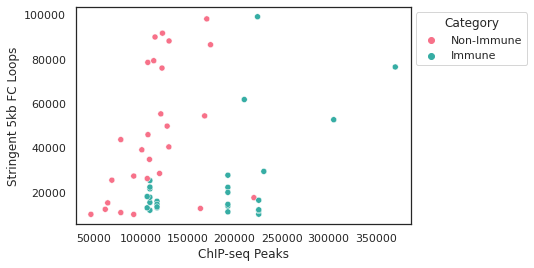

In [9]:
ax = sns.scatterplot(data=samples, x="Peaks", y="Stringent 5kb", hue="Category", palette="husl")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(xlabel="ChIP-seq Peaks", ylabel="Stringent 5kb FC Loops")

#### Unique Anchors

In [2]:
# no mergefilt
unique_anchors_all = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/conserved_anchor_results/all/mergefilt_80percent/anchors.sorted.uniq.txt", header = None)
unique_anchors_immune = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/conserved_anchor_results/immune/mergefilt_80percent/anchors.sorted.uniq.txt", header = None)
unique_anchors_nonimmune = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/conserved_anchor_results/non-immune/mergefilt_80percent/anchors.sorted.uniq.txt", header = None)

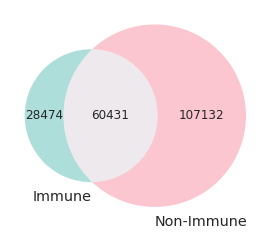

In [3]:
set1 = set(unique_anchors_immune[0])
set2 = set(unique_anchors_nonimmune[0])

venn2([set1, set2], ('Immune', 'Non-Immune'), set_colors=('#36ada4', '#f77189'))
plt.show()

In [9]:
# mergefilt
unique_anchors_all = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/conserved_anchor_results/all/mergefilt_80percent/anchors.sorted.uniq.txt", header = None)
unique_anchors_immune = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/conserved_anchor_results/immune/mergefilt_80percent/anchors.sorted.uniq.txt", header = None)
unique_anchors_nonimmune = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/conserved_anchor_results/non-immune/mergefilt_80percent/anchors.sorted.uniq.txt", header = None)

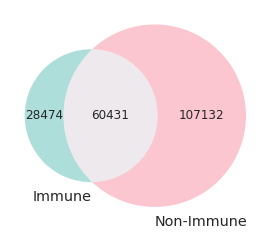

In [12]:
set1 = set(unique_anchors_immune[0])
set2 = set(unique_anchors_nonimmune[0])

venn2([set1, set2], ('Immune', 'Non-Immune'), set_colors=('#36ada4', '#f77189'))
plt.savefig("results/figures/motifs/venn.all_unique_anchors.png", dpi = 1000, bbox_inches="tight")
plt.show()

#### Conserved Anchor Analysis

In [2]:
path = "results/motif_analysis/conserved_anchors_11_06_2024/conserved_anchor_results/{ct}/{lt}/conserved_anchors.bed"
data = []
for cell_type in ["all", 'immune', 'non-immune']:
    for loop_type in ["no_mergefilt_01.27.2025", "mergefilt_80percent"]:
        curr = []
        curr.append(cell_type)
        curr.append(loop_type)
        with open(path.format(ct = cell_type, lt = loop_type)) as f:
            lines = f.readlines()
            curr.append(len(lines))
        data.append(curr)
df = pd.DataFrame(data)
df.columns = ['Category', 'Merge', 'Count']
df

,Category,Merge,Count
0,all,no_mergefilt_01.27.2025,1643
1,all,mergefilt_80percent,1160
2,immune,no_mergefilt_01.27.2025,3687
3,immune,mergefilt_80percent,2410
4,non-immune,no_mergefilt_01.27.2025,1493
5,non-immune,mergefilt_80percent,1006


In [5]:
path = "results/motif_analysis/conserved_anchors_11_06_2024/sea/{ct}/{lt}/jaspar_ncbkgd_masked_biased_downsampling/sea.tsv"
data = []
for cell_type in ["all", 'immune', 'non-immune', 'ctcf']:
    for loop_type in ["no_mergefilt_01.27.2025", "mergefilt_80percent"]:
        curr = []
        curr.append(cell_type)
        curr.append(loop_type)
        df = pd.read_csv(path.format(ct = cell_type, lt = loop_type), sep = "\t", header = 0)
        df = df.loc[df["EVALUE"] < 0.01]
        curr.append(len(df))
        data.append(curr)
df = pd.DataFrame(data)
df.columns = ['Category', 'Merge', 'Count']
df

,Category,Merge,Count
0,all,no_mergefilt_01.27.2025,208
1,all,mergefilt_80percent,204
2,immune,no_mergefilt_01.27.2025,208
3,immune,mergefilt_80percent,225
4,non-immune,no_mergefilt_01.27.2025,186
5,non-immune,mergefilt_80percent,190
6,ctcf,no_mergefilt_01.27.2025,7
7,ctcf,mergefilt_80percent,5


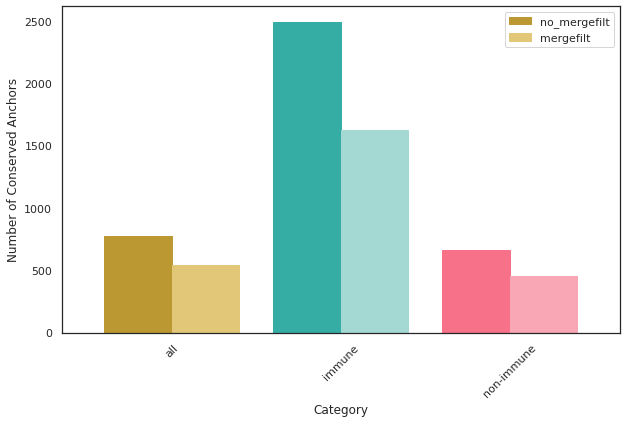

In [11]:
pivot_df = df.pivot(index='Category', columns='Merge', values='Count')
pivot_df = pivot_df[['no_mergefilt', 'mergefilt']]

custom_colors = ['#bb9832', '#36ada4', '#f77189', '#e3c779', '#a4d9d3', '#f9a7b5']

ax = pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)
for i, bar in enumerate(ax.patches):
    bar.set_color(custom_colors[i % len(custom_colors)])
    
plt.ylabel('Number of Conserved Anchors')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.legend()

In [28]:
# no mergefilt
conserved_anchors_all = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/conserved_anchor_results/all/mergefilt_80percent/conserved_anchors.bed", header = None)
conserved_anchors_immune = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/conserved_anchor_results/immune/mergefilt_80percent/conserved_anchors.bed", header = None)
conserved_anchors_nonimmune = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/conserved_anchor_results/non-immune/mergefilt_80percent/conserved_anchors.bed", header = None)

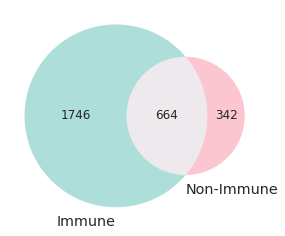

In [29]:
set1 = set(conserved_anchors_immune[0])
set2 = set(conserved_anchors_nonimmune[0])

venn2([set1, set2], ('Immune', 'Non-Immune'), set_colors=('#36ada4', '#f77189'))
plt.savefig("results/figures/motifs/venn.conserved_anchors.png", dpi = 1000, bbox_inches="tight")
plt.show()

In [30]:
immune = []
nonimmune = []
both = []
for s in set1:
    if s not in set2:
        immune.append(s)
    if s in set2:
        both.append(s)
for s in set2:
    if s not in set1:
        nonimmune.append(s)

In [31]:
print(len(both))
print(len(immune))
print(len(nonimmune))

664
1746
342


In [32]:
immune

['chr19\t50355000\t50360000',
 'chr19\t54155000\t54160000',
 'chr1\t206580000\t206585000',
 'chr19\t39430000\t39435000',
 'chr2\t85885000\t85890000',
 'chr19\t46600000\t46605000',
 'chr10\t43395000\t43400000',
 'chr17\t16415000\t16420000',
 'chr16\t29995000\t30000000',
 'chr19\t1100000\t1105000',
 'chr1\t88990000\t88995000',
 'chr6\t159040000\t159045000',
 'chr11\t57665000\t57670000',
 'chr2\t195535000\t195540000',
 'chr19\t38615000\t38620000',
 'chr8\t38385000\t38390000',
 'chr8\t85175000\t85180000',
 'chr10\t72315000\t72320000',
 'chr1\t28245000\t28250000',
 'chr19\t13950000\t13955000',
 'chr1\t225425000\t225430000',
 'chr17\t5485000\t5490000',
 'chr1\t45580000\t45585000',
 'chr2\t42100000\t42105000',
 'chr19\t55605000\t55610000',
 'chr22\t30305000\t30310000',
 'chr17\t39860000\t39865000',
 'chr11\t67350000\t67355000',
 'chr12\t46265000\t46270000',
 'chr11\t66615000\t66620000',
 'chr15\t50765000\t50770000',
 'chr19\t55650000\t55655000',
 'chr9\t36400000\t36405000',
 'chr3\t16510000\t

/mnt/BioAdHoc/Groups/vd-ay/kfetter/packages/mambaforge/envs/hichip-db/lib/python3.9/site-packages/matplotlib_venn/layout/venn3/pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


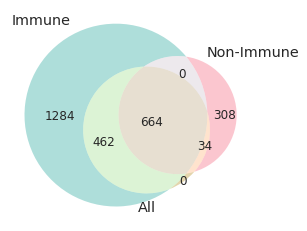

In [8]:
set1 = set(conserved_anchors_immune[0])
set2 = set(conserved_anchors_nonimmune[0])
set3 = set(conserved_anchors_all[0])

venn3([set1, set2, set3], ('Immune', 'Non-Immune', 'All'), set_colors=('#36ada4', '#f77189', '#bb9832'))
plt.show()

In [15]:
# mergefilt
conserved_anchors_all = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/conserved_anchor_results/all/mergefilt/conserved_anchors.bed", header = None)
conserved_anchors_immune = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/conserved_anchor_results/immune/mergefilt/conserved_anchors.bed", header = None)
conserved_anchors_nonimmune = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/conserved_anchor_results/non-immune/mergefilt/conserved_anchors.bed", header = None)

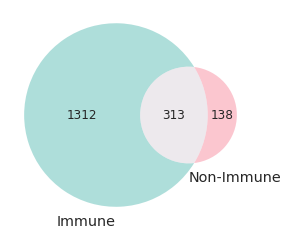

In [16]:
set1 = set(conserved_anchors_immune[0])
set2 = set(conserved_anchors_nonimmune[0])

venn2([set1, set2], ('Immune', 'Non-Immune'), set_colors=('#36ada4', '#f77189'))
plt.show()

/mnt/BioAdHoc/Groups/vd-ay/kfetter/packages/mambaforge/envs/hichip-db/lib/python3.9/site-packages/matplotlib_venn/layout/venn3/pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


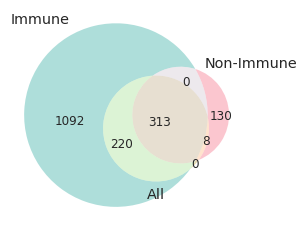

In [17]:
set1 = set(conserved_anchors_immune[0])
set2 = set(conserved_anchors_nonimmune[0])
set3 = set(conserved_anchors_all[0])

venn3([set1, set2, set3], ('Immune', 'Non-Immune', 'All'), set_colors=('#36ada4', '#f77189', '#bb9832'))
plt.show()

#### Motifs

In [13]:
sea_all = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/sea/all/mergefilt_80percent/jaspar_ncbkgd_masked_biased_downsampling/sea.tsv", header = 0, sep = "\t")
sea_immune = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/sea/immune/mergefilt_80percent/jaspar_ncbkgd_masked_biased_downsampling/sea.tsv", header = 0, sep = "\t")
sea_nonimmune = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/sea/non-immune/mergefilt_80percent/jaspar_ncbkgd_masked_biased_downsampling/sea.tsv", header = 0, sep = "\t")
sea_ctcf = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/sea/ctcf/mergefilt_80percent/jaspar_ncbkgd_masked_biased_downsampling/sea.tsv", header = 0, sep = "\t")

sea_all_nm = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/sea/all/no_mergefilt_01.27.2025/jaspar_ncbkgd_masked_biased_downsampling/sea.tsv", header = 0, sep = "\t")
sea_immune_nm = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/sea/immune/no_mergefilt_01.27.2025/jaspar_ncbkgd_masked_biased_downsampling/sea.tsv", header = 0, sep = "\t")
sea_nonimmune_nm = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/sea/non-immune/no_mergefilt_01.27.2025/jaspar_ncbkgd_masked_biased_downsampling/sea.tsv", header = 0, sep = "\t")
sea_ctcf_nm = pd.read_csv("results/motif_analysis/conserved_anchors_11_06_2024/sea/ctcf/no_mergefilt_01.27.2025/jaspar_ncbkgd_masked_biased_downsampling/sea.tsv", header = 0, sep = "\t")

In [14]:
thres = 0.01

In [15]:
motifs_all = list(sea_all.loc[sea_all["EVALUE"] < thres]["ID"])
motifs_immune = list(sea_immune.loc[sea_immune["EVALUE"] < thres]["ID"])
motifs_nonimmune = list(sea_nonimmune.loc[sea_nonimmune["EVALUE"] < thres]["ID"])
motifs_ctcf = list(sea_ctcf.loc[sea_ctcf["EVALUE"] < thres]["ID"])

motifs_all_nm = list(sea_all_nm.loc[sea_all_nm["EVALUE"] < thres]["ID"])
motifs_immune_nm = list(sea_immune_nm.loc[sea_immune_nm["EVALUE"] < thres]["ID"])
motifs_nonimmune_nm = list(sea_nonimmune_nm.loc[sea_nonimmune_nm["EVALUE"] < thres]["ID"])
motifs_ctcf_nm = list(sea_ctcf_nm.loc[sea_ctcf_nm["EVALUE"] < thres]["ID"])

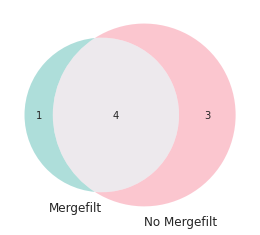

In [16]:
set1 = set(motifs_ctcf)
set2 = set(motifs_ctcf_nm)

venn2([set1, set2], ('Mergefilt', 'No Mergefilt'), set_colors=('#36ada4', '#f77189'))
#plt.savefig("results/figures/motifs/venn.motifs.png", dpi = 1000, bbox_inches="tight")
plt.show()

In [13]:
immune = []
nonimmune = []
both = []
for s in set1:
    if s not in set2:
        immune.append(s)
    if s in set2:
        both.append(s)
for s in set2:
    if s not in set1:
        nonimmune.append(s)

In [15]:
print(len(both))
print(len(immune))
print(len(nonimmune))

244
93
46


In [ ]:
for 

In [22]:
sea_immune[sea_immune['ID'].isin(immune)]

,RANK,DB,ID,ALT_ID,CONSENSUS,TP,TP%,FP,FP%,ENR_RATIO,SCORE_THR,PVALUE,LOG_PVALUE,EVALUE,LOG_EVALUE,QVALUE,LOG_QVALUE
100,101,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA0799.2,RFX4,BSGTTGCYWRGCAACSV,1464.0,67.50,1145.0,54.16,1.25,0.80,2.250000e-19,-42.94,1.630000e-16,-36.35,5.150000e-19,-42.11
122,123,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA0697.1,ZIC3,GACCCCCCGCTGYGH,1049.0,48.36,773.0,36.57,1.32,9.60,3.410000e-15,-33.31,2.480000e-12,-26.72,6.420000e-15,-32.68
138,139,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA0101.1,REL,BGGRNWTTCC,406.0,18.72,234.0,11.07,1.69,12.00,1.140000e-12,-27.50,8.290000e-10,-20.91,1.900000e-12,-26.99
146,147,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA0050.2,IRF1,NTTYASTTTCACTTTCDBTTT,1668.0,76.90,1432.0,67.74,1.14,9.50,1.200000e-11,-25.15,8.710000e-09,-18.56,1.890000e-11,-24.69
153,154,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA0104.4,MYCN,VVCCACGTGGBB,1295.0,59.70,1054.0,49.86,1.20,10.00,5.660000e-11,-23.60,4.110000e-08,-17.01,8.510000e-11,-23.19
156,157,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA1599.1,ZNF682,BVGGCYAAGCCCCWNY,1429.0,65.88,1194.0,56.48,1.17,9.90,1.610000e-10,-22.55,1.170000e-07,-15.96,2.380000e-10,-22.16
162,163,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA1514.1,KLF17,MMCCACGCACCCMTY,1916.0,88.34,1733.0,81.98,1.08,7.40,2.780000e-09,-19.70,2.020000e-06,-13.11,3.950000e-09,-19.35
164,165,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA1657.1,ZNF652,BAAAGRGTTAAN,1295.0,59.70,1077.0,50.95,1.17,10.00,4.800000e-09,-19.16,3.490000e-06,-12.57,6.730000e-09,-18.82
165,166,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA0711.1,OTX1,HTAATCCS,662.0,30.52,481.0,22.75,1.34,12.00,5.290000e-09,-19.06,3.840000e-06,-12.47,7.370000e-09,-18.73
166,167,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA0839.1,CREB3L1,VTGCCACGTCAYCA,1163.0,53.62,949.0,44.89,1.19,7.90,6.540000e-09,-18.85,4.750000e-06,-12.26,9.070000e-09,-18.52


In [23]:
sea_nonimmune[sea_nonimmune['ID'].isin(nonimmune)]

,RANK,DB,ID,ALT_ID,CONSENSUS,TP,TP%,FP,FP%,ENR_RATIO,SCORE_THR,PVALUE,LOG_PVALUE,EVALUE,LOG_EVALUE,QVALUE,LOG_QVALUE
131,132,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA1139.1,FOSL2::JUNB,DATGACGTCATH,144.0,15.89,68.0,7.51,2.10,14.00,1.650000e-08,-17.92,0.000012,-11.33,3.290000e-08,-17.23
141,142,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA0502.2,NFYB,CYCATTGGCCVV,129.0,14.24,63.0,6.96,2.03,14.00,2.930000e-07,-15.04,0.000213,-8.45,5.420000e-07,-14.43
143,144,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA1131.1,FOSL2::JUN,GRTGACGTMAT,294.0,32.45,199.0,21.99,1.47,12.00,3.540000e-07,-14.86,0.000257,-8.27,6.450000e-07,-14.25
157,158,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA0873.1,HOXD12,RGTCGTAAAAH,705.0,77.81,613.0,67.73,1.15,6.60,8.960000e-07,-13.93,0.000652,-7.34,1.490000e-06,-13.42
161,162,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA0717.1,RAX2,YYAATTAV,734.0,81.02,647.0,71.49,1.13,9.90,1.190000e-06,-13.64,0.000863,-7.06,1.930000e-06,-13.16
164,165,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA0644.2,ESX1,YYAATTAN,794.0,87.64,719.0,79.45,1.10,8.80,1.610000e-06,-13.34,0.001170,-6.75,2.570000e-06,-12.87
165,166,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA0721.1,UNCX,YYAATTAV,748.0,82.56,665.0,73.48,1.12,9.60,1.910000e-06,-13.17,0.001390,-6.58,3.020000e-06,-12.71
173,174,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA0895.1,HMBOX1,MYTAGTTAMS,527.0,58.17,430.0,47.51,1.22,11.00,3.430000e-06,-12.58,0.002490,-5.99,5.180000e-06,-12.17
179,180,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA0718.1,RAX,RYYAATTARH,846.0,93.38,789.0,87.18,1.07,8.50,5.350000e-06,-12.14,0.003890,-5.55,7.820000e-06,-11.76
180,181,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA0716.1,PRRX1,YYAATTAR,792.0,87.42,721.0,79.67,1.10,9.70,5.430000e-06,-12.12,0.003950,-5.53,7.890000e-06,-11.75


In [24]:
sea_immune[sea_immune['ID'].isin(both)]

,RANK,DB,ID,ALT_ID,CONSENSUS,TP,TP%,FP,FP%,ENR_RATIO,SCORE_THR,PVALUE,LOG_PVALUE,EVALUE,LOG_EVALUE,QVALUE,LOG_QVALUE
0,1,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA0506.1,NRF1,GCGCVTGCGCR,1502.0,69.25,656.0,31.03,2.23,12.000,1.650000e-141,-324.16,1.200000e-138,-317.58,3.820000e-139,-318.72
1,2,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA1122.1,TFDP1,VSGCGGGAAVN,1757.0,81.01,999.0,47.26,1.71,11.000,7.430000e-121,-276.61,5.400000e-118,-270.02,8.600000e-119,-271.86
2,3,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA1513.1,KLF15,SCCCCGCCCCS,1979.0,91.24,1315.0,62.20,1.47,9.400,9.310000e-119,-271.78,6.770000e-116,-265.19,7.180000e-117,-267.43
3,4,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA0527.1,ZBTB33,BTCTCGCGAGABYTS,1642.0,75.70,883.0,41.77,1.81,8.800,2.710000e-115,-263.80,1.970000e-112,-257.21,1.570000e-113,-259.74
4,5,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA1650.1,ZBTB14,SSCCGCGCACVS,1828.0,84.28,1156.0,54.68,1.54,10.000,2.140000e-101,-231.80,1.560000e-98,-225.21,9.930000e-100,-227.96
5,6,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA0079.5,SP1,GGGGCGGGG,1645.0,75.84,950.0,44.94,1.69,13.000,6.040000e-97,-221.55,4.390000e-94,-214.96,2.330000e-95,-217.90
6,7,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA1713.1,ZNF610,SSCGCCGCTCCSSS,977.0,45.04,341.0,16.13,2.79,15.000,2.340000e-96,-220.20,1.700000e-93,-213.61,7.740000e-95,-216.70
7,8,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA1961.1,PATZ1,SSGGGGMGGGGS,1317.0,60.72,624.0,29.52,2.06,15.000,3.730000e-95,-217.43,2.710000e-92,-210.84,1.080000e-93,-214.06
8,9,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA0733.1,EGR4,NHMCGCCCACGCAHWT,1533.0,70.68,850.0,40.21,1.76,11.000,4.850000e-91,-207.96,3.530000e-88,-201.37,1.250000e-89,-204.71
9,10,/mnt/BioAdHoc/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/data/motifs/motif_databases/Jaspar_CORE_2022_latest_human.meme,MA1721.1,ZNF93,GGYAGCRGCAGCGGYG,1009.0,46.52,389.0,18.40,2.52,15.000,5.410000e-88,-200.94,3.930000e-85,-194.35,1.250000e-86,-197.80
